In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import PIL

import numpy as np

import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from projection_utils import make_grid_np
from style_utils import extract_features, content_loss, style_loss, tv_loss, gram_matrix
from image_utils import *
from main import style_transfer

%matplotlib inline

As in the last assignment, we need to set the dtype to select either the CPU or the GPU

In [2]:
dtype = torch.FloatTensor
# USE GPU (if available).
if torch.cuda.is_available():
    dtype = torch.cuda.FloatTensor

In [3]:
# TODO: Replace with vgg
# Load the pre-trained SqueezeNet model.
cnn = torchvision.models.squeezenet1_1(pretrained=True).features
cnn.type(dtype)

# We don't want to train the model any further, so we don't want PyTorch to waste computation 
# computing gradients on parameters we're never going to update.
for param in cnn.parameters():
    param.requires_grad = False

C:\Users\allanzhou\Anaconda3\envs\py3.6\lib\site-packages\torchvision\models\squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
C:\Users\allanzhou\Anaconda3\envs\py3.6\lib\site-packages\torchvision\models\squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


## Generate some pretty pictures!

Try out `style_transfer` on the three different parameter sets below. Make sure to run all three cells. Feel free to add your own, but make sure to include the results of style transfer on the third parameter set (starry night) in your submitted notebook.

* The `content_image` is the filename of content image.
* The `style_image` is the filename of style image.
* The `image_size` is the size of smallest image dimension of the content image (used for content loss and generated image).
* The `style_size` is the size of smallest style image dimension.
* The `content_layer` specifies which layer to use for content loss.
* The `content_weight` gives weighting on content loss in the overall loss function. Increasing the value of this parameter will make the final image look more realistic (closer to the original content).
* `style_layers` specifies a list of which layers to use for style loss. 
* `style_weights` specifies a list of weights to use for each layer in style_layers (each of which will contribute a term to the overall style loss). We generally use higher weights for the earlier style layers because they describe more local/smaller scale features, which are more important to texture than features over larger receptive fields. In general, increasing these weights will make the resulting image look less like the original content and more distorted towards the appearance of the style image.
* `tv_weight` specifies the weighting of total variation regularization in the overall loss function. Increasing this value makes the resulting image look smoother and less jagged, at the cost of lower fidelity to style and content. 

Below the next three cells of code (in which you shouldn't change the hyperparameters), feel free to copy and paste the parameters to play around them and see how the resulting image changes. 

C:\Users\allanzhou\Anaconda3\envs\py3.6\lib\site-packages\torchvision\transforms\transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


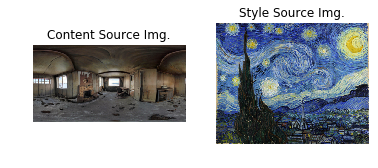

Iteration 0


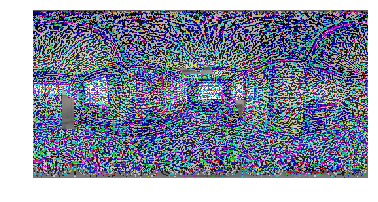

KeyboardInterrupt: 

In [4]:
params0 = {
    'cnn': cnn,
    'content_image' : '360.jpg',
    'style_image' : 'styles/starry_night.jpg',
    'image_size' : (256,512),
    'style_size' : 512,
    'content_layer' : 3,
    'content_weight' : 6e-2, 
    'style_layers' : (1, 4, 6, 7),
    'style_weights' : [300000, 1000, 15, 3],
    'tv_weight' : 2e-2
}

res_var = style_transfer(**params0)

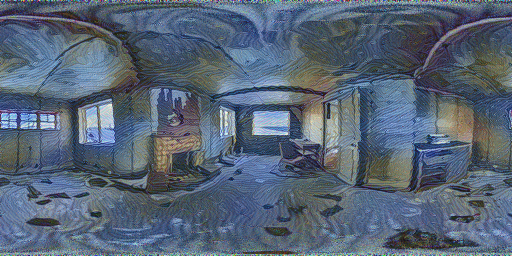

In [16]:
deprocess(res_var.data.cpu().clone())

In [ ]:
# Composition VII + Tubingen
params1 = {
    'cnn': cnn,
    'content_image' : 'styles/tubingen.jpg',
    'style_image' : 'styles/composition_vii.jpg',
    'image_size' : 192,
    'style_size' : 512,
    'content_layer' : 3,
    'content_weight' : 5e-2, 
    'style_layers' : (1, 4, 6, 7),
    'style_weights' : (20000, 500, 12, 1),
    'tv_weight' : 5e-2
}

style_transfer(**params1)

/Users/ianlee/cs194-129/assignment2/.env/lib/python3.6/site-packages/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


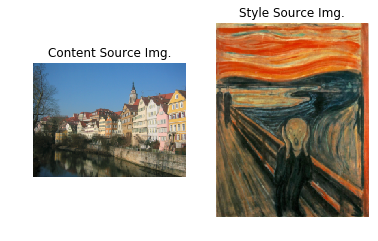

Iteration 0


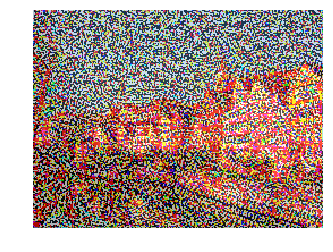

Iteration 100


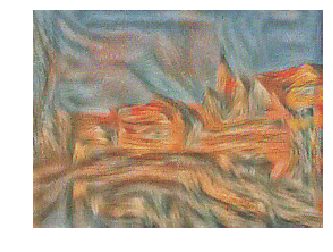

Iteration 199


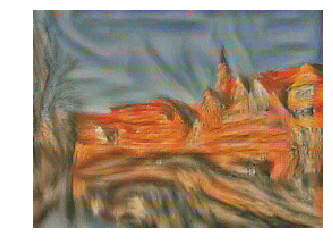

In [58]:
# Scream + Tubingen
params2 = {
    'cnn': cnn,
    'content_image':'styles/tubingen.jpg',
    'style_image':'styles/the_scream.jpg',
    'image_size':192,
    'style_size':224,
    'content_layer':3,
    'content_weight':3e-2,
    'style_layers':[1, 4, 6, 7],
    'style_weights':[200000, 800, 12, 1],
    'tv_weight':2e-2
}

style_transfer(**params2)

/Users/ianlee/cs194-129/assignment2/.env/lib/python3.6/site-packages/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


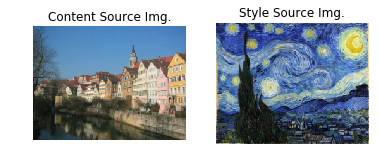

Iteration 0


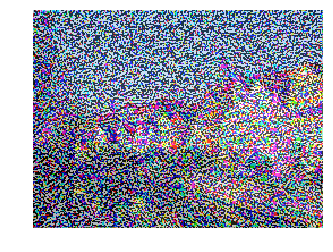

Iteration 100


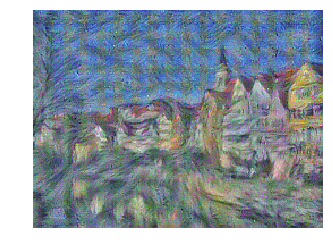

Iteration 199


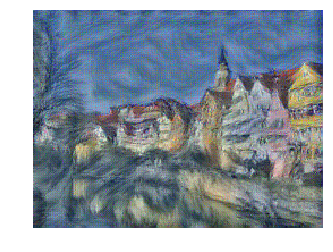

In [59]:
# Starry Night + Tubingen
params3 = {
    'cnn': cnn,
    'content_image' : 'styles/tubingen.jpg',
    'style_image' : 'styles/starry_night.jpg',
    'image_size' : 192,
    'style_size' : 192,
    'content_layer' : 3,
    'content_weight' : 6e-2,
    'style_layers' : [1, 4, 6, 7],
    'style_weights' : [300000, 1000, 15, 3],
    'tv_weight' : 2e-2
}

style_transfer(**params3)